In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/sample/processed.csv")

print("Shape:", df.shape)
print("Unique users:", df["userId"].nunique())
print("Unique movies:", df["movieId"].nunique())

Shape: (995492, 6)
Unique users: 6040
Unique movies: 3043


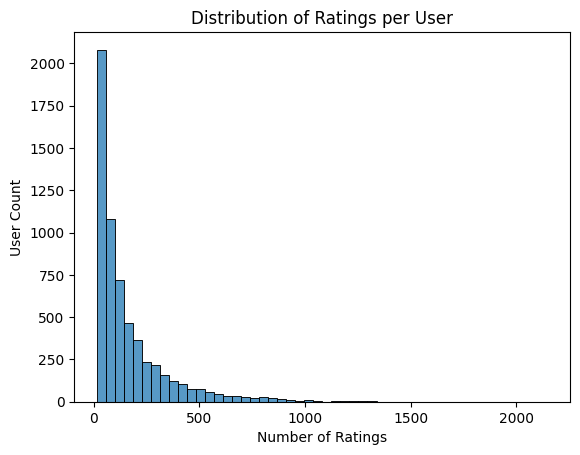

In [4]:
sns.histplot(df.groupby("userId")["rating"].count(), bins=50)
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("User Count")
plt.show()

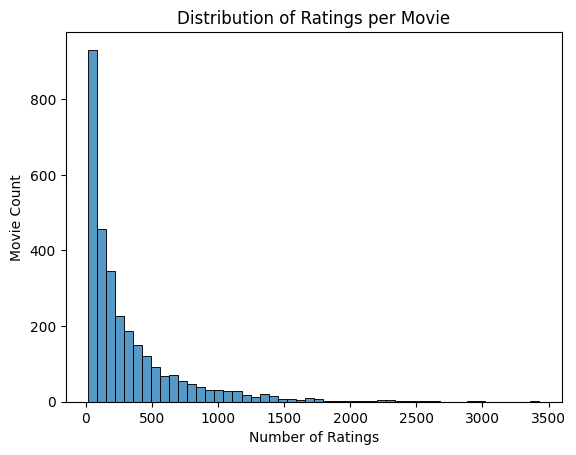

In [5]:
sns.histplot(df.groupby("movieId")["rating"].count(), bins=50)
plt.title("Distribution of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Count")
plt.show()

In [6]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe())


Shape: (995492, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995492 entries, 0 to 995491
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     995492 non-null  int64 
 1   movieId    995492 non-null  int64 
 2   rating     995492 non-null  int64 
 3   timestamp  995492 non-null  int64 
 4   title      995492 non-null  object
 5   genres     995492 non-null  object
dtypes: int64(4), object(2)
memory usage: 45.6+ MB
None

Missing values:
 userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

Summary stats:
               userId        movieId         rating     timestamp
count  995492.000000  995492.000000  995492.000000  9.954920e+05
mean     3025.038508    1864.876214       3.584080  9.722275e+08
std      1728.595842    1095.704381       1.115846  1.213191e+07
min         1.000000       1.000000       1.000000  9.567039e+08
25%      1507.750000    1

In [7]:
print("Unique users:", df["userId"].nunique())
print("Unique movies:", df["movieId"].nunique())

Unique users: 6040
Unique movies: 3043


/var/folders/pm/9bq4h89j5zx32byxbftsqkjh0000gp/T/ipykernel_9130/3548674670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, palette="viridis")


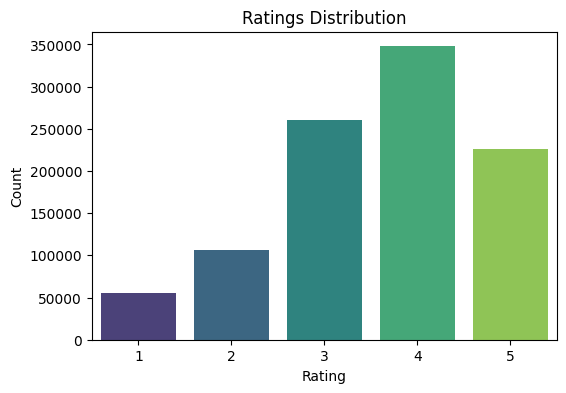

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df, palette="viridis")
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

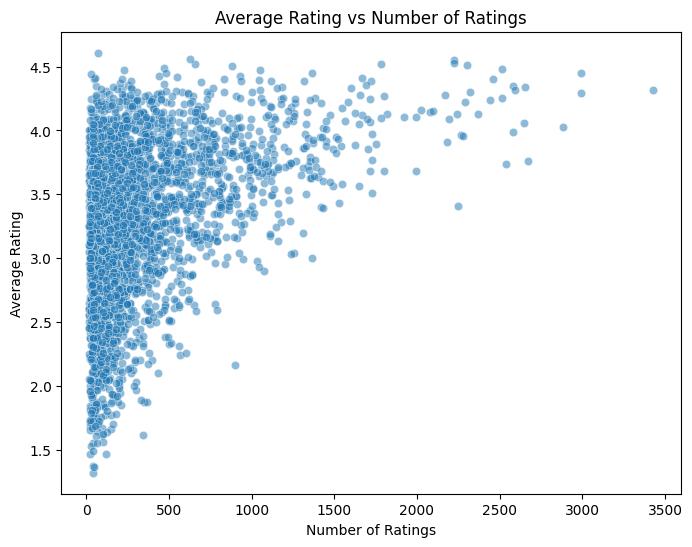

In [9]:
movie_stats = df.groupby("movieId").agg(
    avg_rating=("rating", "mean"),
    num_ratings=("rating", "count")
).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=movie_stats, x="num_ratings", y="avg_rating", alpha=0.5)
plt.title("Average Rating vs Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

In [10]:
top_movies = movie_stats.sort_values("num_ratings", ascending=False).head(10)
top_movies = top_movies.merge(df[["movieId", "title"]].drop_duplicates(), on="movieId")

print("Top 10 Most Rated Movies:")
display(top_movies[["title", "num_ratings", "avg_rating"]])

Top 10 Most Rated Movies:


,title,num_ratings,avg_rating
0,American Beauty (1999),3428,4.317386
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
4,Jurassic Park (1993),2672,3.763847
5,Saving Private Ryan (1998),2653,4.337354
6,Terminator 2: Judgment Day (1991),2649,4.058513
7,"Matrix, The (1999)",2590,4.315830
8,Back to the Future (1985),2583,3.990321
9,"Silence of the Lambs, The (1991)",2578,4.351823


In [11]:
df_genres = df.copy()
df_genres["genres"] = df_genres["genres"].str.split("|")
df_genres = df_genres.explode("genres")


/var/folders/pm/9bq4h89j5zx32byxbftsqkjh0000gp/T/ipykernel_9130/3599802438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")


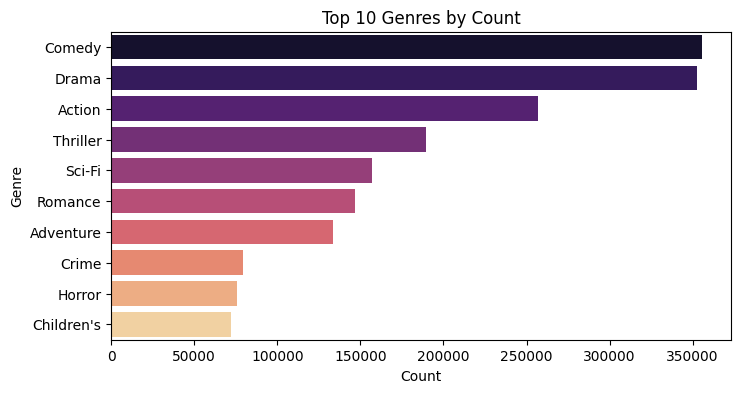

In [12]:
genre_counts = df_genres["genres"].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title("Top 10 Genres by Count")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


/var/folders/pm/9bq4h89j5zx32byxbftsqkjh0000gp/T/ipykernel_9130/3494978274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="coolwarm")


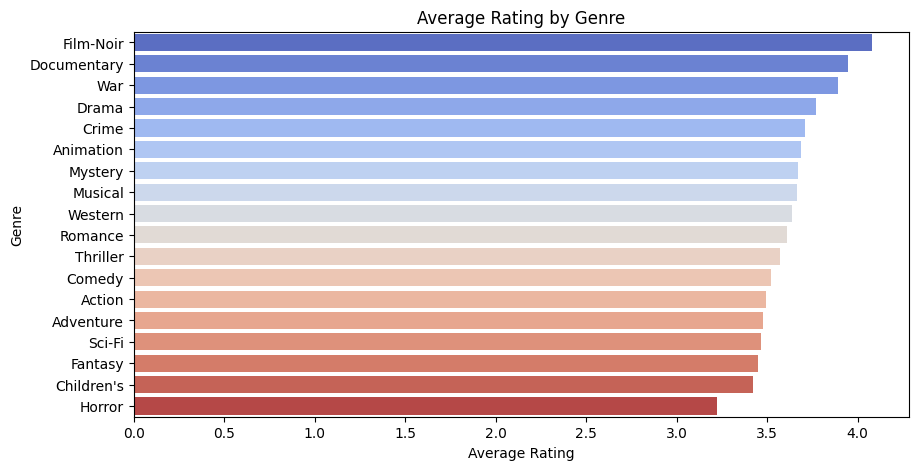

In [13]:
genre_ratings = df_genres.groupby("genres")["rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="coolwarm")
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()